In [1]:
import numpy as np
import pandas as pd
import requests
import os
import glob
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import datetime
import seaborn as sns

# 1 - Gathering Data

- The WeRateDogs Twitter archive.
- The tweet image predictions.
- Twitter API

In [2]:
# Read Csv file ...
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#URL downloaded programatically ...

img_pred_url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_pred_name = img_pred_url.split('/')[-1]
response = requests.get(img_pred_url)

if not os.path.exists(img_pred_name):
    with open(img_pred_name,'wb') as file:
        file.write(response.content)


In [5]:
# Read TSV file ... 
Image_predictions_df = pd.read_csv(img_pred_name, sep='\t')
Image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
api_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        api_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})

api_df = pd.DataFrame(api_list)
api_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# 2 - Assessing Data


## visual assessment

In [8]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
Image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
api_df

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


## programmatic assessment

 * twitter archive assessment

In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

1 - missing values in cols ( in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,
                             retweeted_status_timestamp, expaneded_urls)
                             
2 - timpstamp datatype                           

In [12]:
sum(archive_df.duplicated())

0

In [13]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Min 0 in rating_numerator and rating donominator ? 

Max 170 in rating denominator 

In [14]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

* image prediction assessment 

In [15]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The name of this coulmns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) have no meaning

In [16]:
Image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


* twitter api assessment

In [17]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
api_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


min and max equal 0? the tweet has no image maybe

### Quality issues ...


* Missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,  retweeted_status_timestamp, expanded_urls) columns.

* Inaccurate data in (doggo, floofer, pupper, puppo) columns.

* wrong datatype for (timestamp) column.

* many tweets has no image. 

* The name of this coulmns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) have no meaning.

* name column has invalid data (a, an, all, etc).

* rating denominator has values other than 10.

* rating numerator has values less than 10 and high values like 1776.

* tweet ids in image prediction missing in archive dataset.

* source column has unwanted tags.





### Tidness issues ...

* the columns (doggo, floofer, pupper, puppo) should be merged in one column.

* Merge retweet_count and favourite_count columns in api dataset with archive dataset.

* Merge (p1, p2, p3) coulmns in one column.


This columns means that the tweet is not original (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,  retweeted_status_timestamp).

expanded_urls nan values means the tweet has no image.


# Cleaning Data 


In [19]:
# copying the original data ... 

archive_clean = archive_df.copy()
img_clean = Image_predictions_df.copy()
api_clean = api_df.copy()

### Define
* change the timestamp datatype to datetime 

#### Code

In [20]:
# change the timestamp datatype to datetime ... 

archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)


#### Test

In [21]:
archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Define
* Remove the html tags from source column.

#### Code

In [22]:
source = archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

archive_clean.source = archive_clean.source

#### Test

In [23]:
archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [24]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
Solve (doggo, floofer, pupper, puppo) columns 
* replace none string with empty string.

* merge the four columns in one column "dog_breed".

* drop the four columns.

* replace the empty cells with nan in dog_breed column.


#### Code

In [25]:
archive_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
archive_clean.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
archive_clean.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [28]:
archive_clean.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [29]:
# replace the None values with empty string ...

archive_clean.iloc[:, 13:] = archive_clean.iloc[:,13:].replace('None','')

In [30]:
# create a new column dog breed and combine the four cols in it ...

archive_clean['dog_breed'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [31]:
# drop the 4 cols ... 

archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [32]:
# replace the empty string with nan ...

archive_clean.dog_breed = archive_clean.dog_breed.replace('', np.nan)

In [33]:
archive_clean.dog_breed.value_counts(dropna = False)

NaN             1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_breed, dtype: int64

In [34]:
# seperate the combine string in dog breed col. ... 

archive_clean[archive_clean['dog_breed'] == 'doggopupper'] = 'doggo-pupper'
archive_clean[archive_clean['dog_breed'] == 'doggopuppo'] = 'doggo-puppo'
archive_clean[archive_clean['dog_breed'] == 'doggofloofer'] = 'doggo-floofer'

#### Test

In [35]:
archive_clean.dog_breed.value_counts(dropna = False)

NaN              1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_breed, dtype: int64

### Define

* Replace wrong values with np.nan.

* Replace the None values in name column with np.nan.

#### Code

In [36]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = np.nan

In [37]:
# replace the None values in name column with np.nan ...

archive_clean['name'] = archive_clean['name'].replace('None',np.nan)

#### Test

In [38]:
# replace (a, an, the, etc) with np.nan ... 

archive_clean.name.value_counts(dropna=False)

NaN         858
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
Toby          7
Buddy         7
Daisy         7
Bailey        7
Dave          6
Oscar         6
Milo          6
Scout         6
Stanley       6
Jax           6
Rusty         6
Bella         6
Jack          6
Koda          6
Leo           6
Finn          5
Oakley        5
Alfie         5
Sunny         5
           ... 
Rupert        1
Banditt       1
Mason         1
Severus       1
Yoda          1
Carter        1
Rontu         1
Jockson       1
Venti         1
Ridley        1
Rey           1
Milky         1
Monty         1
Obi           1
Biden         1
Shadoe        1
Mona          1
Stewie        1
Henry         1
Stuart        1
Lizzie        1
Lugan         1
Stark         1
Rorie         1
Ember         1
Ralphson      1
Mitch         1
Harry         1
Eevee         1
Tater         1
Name: name, Length: 929,

### Define 

* remove tweets with no images

#### Code

In [39]:
# remove tweets with no image 

tweets_with_image = list(img_clean.tweet_id.unique())

archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]

#### Test

In [40]:
len(archive_clean[~archive_clean.tweet_id.isin(img_clean.tweet_id)])

0

In [41]:
archive_clean.shape

(2062, 14)

### Define

* Remove unoriginal tweets 

#### Code

In [42]:
# drop unoriginal tweets from twitter archive dataset ...

archive_clean.drop(archive_clean[archive_clean.in_reply_to_status_id.notna()].index, inplace=True)
archive_clean.drop(archive_clean[archive_clean.in_reply_to_user_id.notna()].index, inplace=True)
archive_clean.drop(archive_clean[archive_clean.retweeted_status_id.notna()].index, inplace=True)
archive_clean.drop(archive_clean[archive_clean.retweeted_status_user_id.notna()].index, inplace=True)
archive_clean.drop(archive_clean[archive_clean.retweeted_status_timestamp.notna()].index, inplace=True)



In [43]:
# drop the columns ...

archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                   'retweeted_status_timestamp'], axis=1, inplace=True)

In [44]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Test

In [45]:
original_tweets = list(archive_clean.tweet_id.unique())

# drop unoriginal tweets from image prediction ... 
img_clean = img_clean[img_clean.tweet_id.isin(original_tweets)]

# drop unoriginal tweets from api dataset ...
api_clean = api_clean[api_clean.tweet_id.isin(original_tweets)]

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null object
rating_denominator    1961 non-null object
name                  1345 non-null object
dog_breed             293 non-null object
dtypes: object(9)
memory usage: 153.2+ KB


In [47]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1961 non-null int64
jpg_url     1961 non-null object
img_num     1961 non-null int64
p1          1961 non-null object
p1_conf     1961 non-null float64
p1_dog      1961 non-null bool
p2          1961 non-null object
p2_conf     1961 non-null float64
p2_dog      1961 non-null bool
p3          1961 non-null object
p3_conf     1961 non-null float64
p3_dog      1961 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 158.9+ KB


In [48]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    1961 non-null int64
retweet_count     1961 non-null int64
tweet_id          1961 non-null int64
dtypes: int64(3)
memory usage: 61.3 KB


### Define
* Renaming the columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

#### Code

In [49]:
# Renaming the image dataset columns ...

cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
img_clean.columns = cols

#### Test

In [50]:
img_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

* Merge (p1, p2, p3) columns in one column prediction_level. 

#### Code

In [51]:
# convert the values to variables  ...

img = pd.wide_to_long(img_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [52]:
img.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [53]:
img.shape

(5883, 7)

### Define

* Extract ratings from text.

#### Code

In [54]:
archive_clean['rating_numerator'] = archive_clean.rating_numerator.astype(float)
archive_clean['rating_denominator'] = archive_clean.rating_denominator.astype(float)

In [55]:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
# ratings[0]

In [56]:
archive_clean.rating_numerator = ratings[0]
archive_clean.rating_denominator = ratings[1]

#### Test

In [57]:
archive_clean.rating_numerator.value_counts()

12       441
10       416
11       391
13       251
9        150
8         95
7         52
14        33
6         32
5         31
3         19
4         16
2          9
1          5
84         1
204        1
11.26      1
80         1
1776       1
24         1
121        1
44         1
420        1
0          1
165        1
11.27      1
13.5       1
144        1
88         1
60         1
50         1
99         1
9.75       1
45         1
Name: rating_numerator, dtype: int64

In [58]:
archive_clean.rating_denominator.value_counts()

10     1944
50        3
11        2
80        2
70        1
40        1
7         1
20        1
170       1
110       1
90        1
150       1
2         1
120       1
Name: rating_denominator, dtype: int64

### Define

* Merge count tweet and favourite tweet with archive_clean in one dataframe.

#### Code

In [59]:
# change tweet_id datatype to strin in api dataset ... 

api_clean['tweet_id'] = api_clean.tweet_id.astype(np.int64).astype(str)
api_clean['tweet_id'].dtypes


dtype('O')

In [60]:
archive_clean['tweet_id'] = archive_clean.tweet_id.astype(str)

archive_clean['tweet_id'].dtypes

dtype('O')

In [61]:
# merge the two datasets ... 

# master_df = pd.merge(left=archive_clean, right=api_clean, how='outer',on='tweet_id')
master_df = pd.merge(archive_clean,  api_clean, on=['tweet_id'])

#### Test

In [62]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 11 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null object
rating_denominator    1961 non-null object
name                  1345 non-null object
dog_breed             293 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
dtypes: int64(2), object(9)
memory usage: 183.8+ KB


In [63]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,9774


# Storing Data

In [64]:
# save master dataset ... 

master_df.to_csv('twitter_archive_master.csv', index=False)
img.to_csv('image_prediction_clean.csv', index=False)

# Visualization 


In [65]:
master_df.groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[12::-1]


dog_breed
pupper     2382.502488
floofer    4968.714286
puppo      6473.954545
doggo      7125.698413
Name: retweet_count, dtype: float64

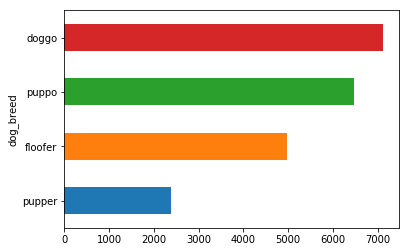

In [66]:
breed_avg_retweet = master_df.groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[12::-1]
breed_avg_retweet.plot(kind='barh');

In [67]:
img.prediction.value_counts()
# img.info()

golden_retriever                  260
Labrador_retriever                260
Chihuahua                         178
Pembroke                          138
Cardigan                          112
Pomeranian                        103
toy_poodle                        102
pug                                92
chow                               91
French_bulldog                     90
cocker_spaniel                     88
Chesapeake_Bay_retriever           87
Eskimo_dog                         81
beagle                             73
Siberian_husky                     72
kuvasz                             69
malamute                           66
Staffordshire_bullterrier          66
Samoyed                            64
Pekinese                           62
kelpie                             58
American_Staffordshire_terrier     56
miniature_pinscher                 55
Great_Pyrenees                     52
miniature_poodle                   52
Italian_greyhound                  48
collie      

In [68]:
dog_type = img.prediction.drop_duplicates()
dog_type

0            Welsh_springer_spaniel
1                            collie
2                 Shetland_sheepdog
3                           redbone
4                miniature_pinscher
5               Rhodesian_ridgeback
6                   German_shepherd
7                          malinois
8                        bloodhound
13                       Rottweiler
14                         Doberman
15             Bernese_mountain_dog
16                 English_springer
17       Greater_Swiss_Mountain_dog
18                       box_turtle
19                       mud_turtle
20                         terrapin
21                             chow
22                  Tibetan_mastiff
23                         fur_coat
24                    shopping_cart
25                  shopping_basket
26                 golden_retriever
27                 miniature_poodle
28                         komondor
29      soft-coated_wheaten_terrier
32               Labrador_retriever
33                    Gordon

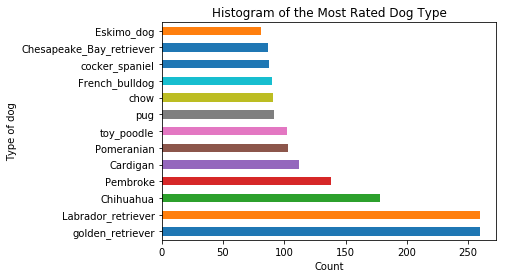

In [69]:
df_dog_type = img.groupby('prediction').filter(lambda x: len(x) >= 75)

df_dog_type['prediction'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [70]:
avg_retweet_count_dog_stage = master_df.groupby('dog_breed').retweet_count.mean()

# the index with stand for the x axis in plotting 
avg_retweet_count_dog_stage.index

avg_favorite_count_dog_stage = master_df.groupby('dog_breed').favorite_count.mean()

In [71]:
avg_retweet_count_dog_stage.index
width = 0.25
ind = np.arange(len(avg_retweet_count_dog_stage))


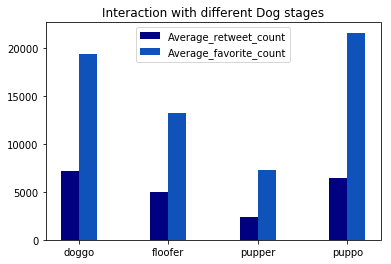

In [72]:
width = 0.2
ind = np.arange(len(avg_favorite_count_dog_stage))
locations = ind + width / 2
labels = avg_favorite_count_dog_stage.index
plt.bar(ind, avg_retweet_count_dog_stage, width, color='#000080', label= 'Average_retweet_count')
plt.bar(ind +width , avg_favorite_count_dog_stage, width, color='#0F52BA', label= 'Average_favorite_count')
plt.xticks(locations, labels)
plt.legend()
plt.title("Interaction with different Dog stages");

In [73]:
master_df.dog_breed.value_counts()

pupper     201
doggo       63
puppo       22
floofer      7
Name: dog_breed, dtype: int64

In [74]:
master_df.corr()
#  high correlation between fav counts ant retweet counts

,favorite_count,retweet_count
favorite_count,1.000000,0.912217
retweet_count,0.912217,1.000000


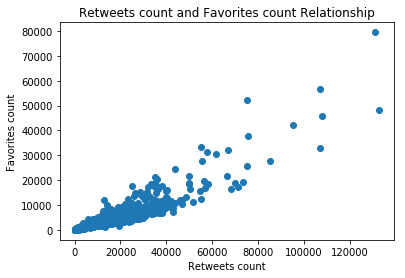

In [75]:
plt.scatter(master_df['favorite_count'],master_df['retweet_count'])
plt.xlabel('Retweets count')
plt.ylabel('Favorites count')
plt.title('Retweets count and Favorites count Relationship');


In [78]:
counts = master_df.source.value_counts()
names = ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']

* Iphone is the most device used for tweets about 98%

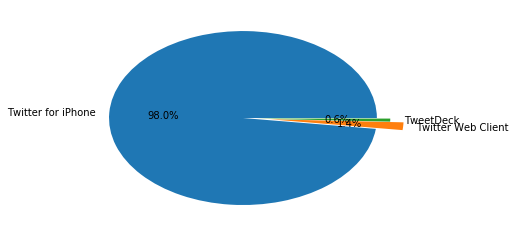

In [79]:
plt.pie(counts, labels=names, explode = (0.1, 0.1, 0), 
        autopct = '%1.1f%%' );